# Example State Machine Usage

Shows use of (amongst other things)

 - Actions
 - Extended State Variables
 - Guards Conditions.

An action does something with an event and stores it (in this example, transforms the string 'pizza' to 'cooked 'pizza'.

It then waits for a 'cooked order' event, with payload of 'cooked pizza', before giving it to the customer.

In [43]:
from state_machine import StateMachine, State, Event, PseudoState

In [44]:
receptionist = StateMachine( 'Receptionist' )

wait_for_customer   = receptionist.create_state('Wait For Customer')
wait_for_order      = receptionist.create_state('Wait For Order')

def enter_order_action(event, state):
    state.machine.vars['order']='cooked %s'%event.payload
    state.logger.info( 'Ordered %s',state.machine.vars['order'] )

wait_for_customer.add_transition_to(wait_for_order, 'customer orders', action=enter_order_action)

INFO:default:Creating state of type <class 'state_machine.state.State'>
INFO:default:Creating state of type <class 'state_machine.state.State'>


In [45]:
def give_order_action(event, state):
    state.logger.info('Giving %s to customer',event.payload)

def wait_for_order_guard(event, state):
    if event.payload==state.machine.vars['order']:
        state.logger.info( 'Guard received %s, which is what it wants', event.payload)
        return True
    else:
        state.logger.info( 'Guard received %s, which it does not want', event.payload)
        
wait_for_order.add_transition_to(wait_for_customer, 'cooked order', guard=wait_for_order_guard, action=give_order_action)

In [46]:
receptionist.initial_state=wait_for_customer

When the 'enter_order' state is entered, the enter_order_action is called and stores 'cooked pizza'.

The guard, wait_for_order_guard, only lets transition pass if the payload is the same as the order variable.

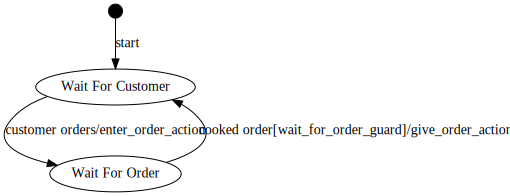

In [47]:
from state_machine import display_machine
display_machine(receptionist)

In [48]:
receptionist.initialise()

evt = Event('customer orders', 'pizza')
receptionist.notify(evt)

evt = Event('cooked order', 'cooked lasagne')
receptionist.notify(evt)

evt = Event('cooked order', 'cooked pizza')
receptionist.notify(evt)

INFO:default:Receptionist transitioning to state State:Wait For Order
INFO:default:Ordered cooked pizza
INFO:default:Guard received cooked lasagne, which it does not want
INFO:default:Guard received cooked pizza, which is what it wants
INFO:default:Receptionist transitioning to state State:Wait For Customer
INFO:default:Giving cooked pizza to customer
